In [35]:
import pandas as pd
import numpy as np
rd = pd.read_csv('/Users/srivatsasrinathmurthy/Desktop/ccrimes.csv')
rd.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,6,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


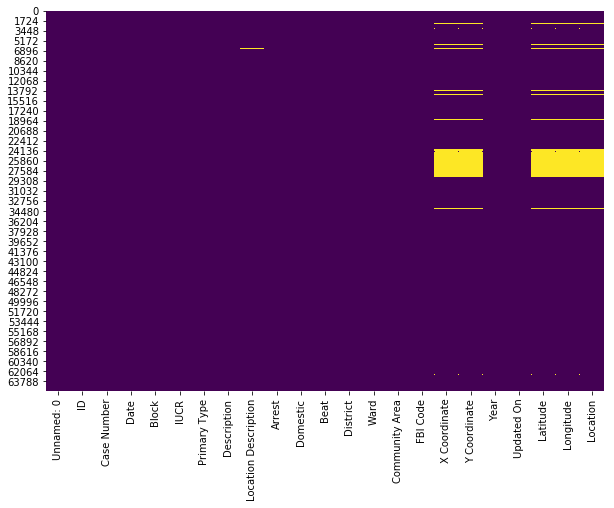

In [36]:
import matplotlib.pyplot as plot
import seaborn as sns
plot.figure(figsize=(10,7))
sns.heatmap(rd.isnull(), cbar = False, cmap = 'viridis')

In [37]:
rd = rd.dropna()
rd = rd.drop(['Unnamed: 0', 'ID', 'Case Number', 'Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)
pd.value_counts(rd['Primary Type'])[:10]

THEFT                  12470
BATTERY                11410
CRIMINAL DAMAGE         6135
NARCOTICS               5632
ASSAULT                 4178
OTHER OFFENSE           4039
DECEPTIVE PRACTICE      2871
BURGLARY                2809
MOTOR VEHICLE THEFT     2285
ROBBERY                 2209
Name: Primary Type, dtype: int64

In [38]:
pd.value_counts(rd['Location Description'])[:10]

STREET                            14113
RESIDENCE                          9196
APARTMENT                          7892
SIDEWALK                           5327
OTHER                              2376
PARKING LOT/GARAGE(NON.RESID.)     1702
SCHOOL, PUBLIC, BUILDING           1309
SMALL RETAIL STORE                 1302
ALLEY                              1207
RESTAURANT                         1204
Name: Location Description, dtype: int64

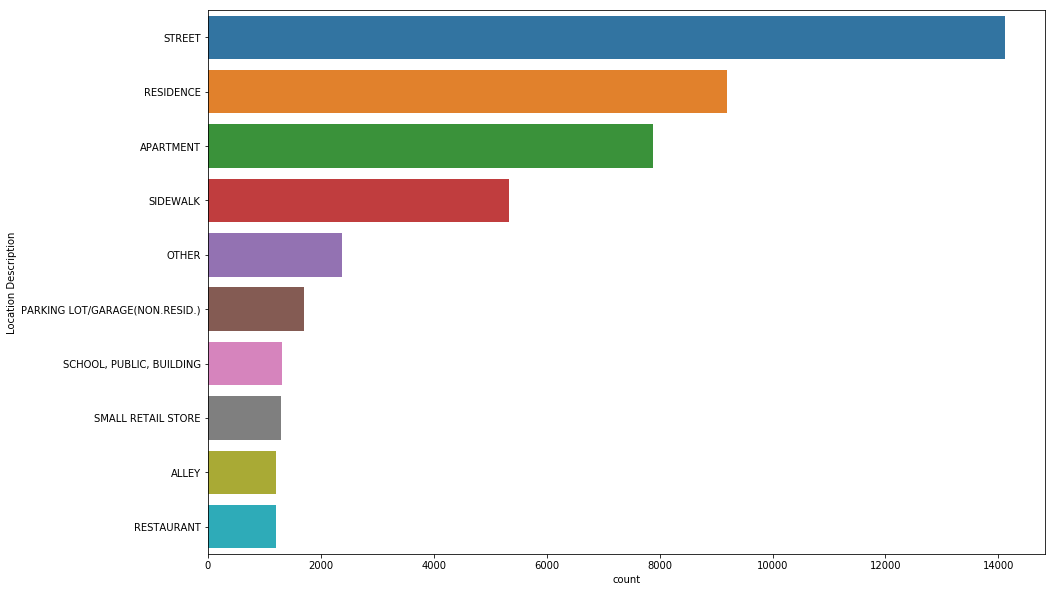

In [45]:
plot.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = rd, order = rd['Location Description'].value_counts().iloc[0:10].index)

In [46]:
import folium
c_m = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

In [47]:
locs = rd.groupby('Community Area').first()

In [48]:
new_locs = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [49]:
new_locs.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
1.0,41.998131,-87.665814,SIDEWALK,False
2.0,41.999731,-87.705810,STREET,False
3.0,41.972843,-87.671127,HOSPITAL BUILDING/GROUNDS,False
4.0,41.981316,-87.695119,RESIDENTIAL YARD (FRONT/BACK),False
5.0,41.961482,-87.676856,MEDICAL/DENTAL OFFICE,False
